In [123]:
library( "DESeq2" )
library('tximport')
library('stringr')
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
out_file_path <- './'
data_dir <- paste(out_file_path,'data/th_data/', sep = '')
compass_data_dir <- paste(data_dir,'GSE162300_DFMO_RNA_est_counts.csv', sep = '')

**read in bulk RNA data**

In [16]:
compass_data_raw <- read.csv(compass_data_dir, sep = ',', row.names = 1) # estimated counts
head(compass_data_raw)

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,⋯,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,570.0,624,786,846,864,978,⋯,1183,1332,794,853.00,928,1045.00,1120,1163.00,710.00,723
0610009B22RIK,93,98,66,70,87.9,100,123,128,106,104,⋯,94,76,109,145.00,121,131.00,131,137.78,137.00,148
0610009L18RIK,2,2,2,1,3.0,4,4,5,3,2,⋯,6,3,0,0.00,5,11.00,3,4.00,4.00,5
0610009O20RIK,177,206,148,170,194.0,159,168,172,161,158,⋯,249,284,202,254.98,216,228.98,212,226.00,258.97,246
0610010F05RIK,24,23,23,25,41.0,43,32,22,32,31,⋯,46,39,30,40.00,44,55.00,24,31.00,20.00,14
0610010K14RIK,182,254,211,256,193.0,239,231,254,264,313,⋯,243,288,297,310.00,317,294.00,283,332.00,416.00,453


for now, round ints

In [20]:
n_floats = compass_data_raw[compass_data_raw != floor(compass_data_raw)]
length(n_floats)

[1] 91200

In [22]:
# for now, round ints
compass_data <- round(compass_data_raw)

In [23]:
head(compass_data)

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,⋯,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,570,624,786,846,864,978,⋯,1183,1332,794,853,928,1045,1120,1163,710,723
0610009B22RIK,93,98,66,70,88,100,123,128,106,104,⋯,94,76,109,145,121,131,131,138,137,148
0610009L18RIK,2,2,2,1,3,4,4,5,3,2,⋯,6,3,0,0,5,11,3,4,4,5
0610009O20RIK,177,206,148,170,194,159,168,172,161,158,⋯,249,284,202,255,216,229,212,226,259,246
0610010F05RIK,24,23,23,25,41,43,32,22,32,31,⋯,46,39,30,40,44,55,24,31,20,14
0610010K14RIK,182,254,211,256,193,239,231,254,264,313,⋯,243,288,297,310,317,294,283,332,416,453


In [33]:
meta_data$sample

[1] "Th17p_Vehicle_WT1" "Th17p_Vehicle_WT1" "Th17n_Vehicle_WT1"
 [4] "Th17n_Vehicle_WT1" "iTreg_Vehicle_WT1" "iTreg_Vehicle_WT1"
 [7] "Th17p_DFMO_WT1"    "Th17p_DFMO_WT1"    "Th17n_DFMO_WT1"   
[10] "Th17n_DFMO_WT1"    "iTreg_DFMO_WT1"    "iTreg_DFMO_WT1"   
[13] "Th17p_Vehicle_WT2" "Th17p_Vehicle_WT2" "Th17n_Vehicle_WT2"
[16] "Th17n_Vehicle_WT2" "iTreg_Vehicle_WT2" "iTreg_Vehicle_WT2"
[19] "Th17p_DFMO_WT2"    "Th17p_DFMO_WT2"    "Th17n_DFMO_WT2"   
[22] "Th17n_DFMO_WT2"    "iTreg_DFMO_WT2"    "iTreg_DFMO_WT2"   
[25] "Th17p_Vehicle_WT3" "Th17p_Vehicle_WT3" "Th17n_Vehicle_WT3"
[28] "Th17n_Vehicle_WT3" "iTreg_Vehicle_WT3" "iTreg_Vehicle_WT3"
[31] "Th17p_DFMO_WT3"    "Th17p_DFMO_WT3"    "Th17n_DFMO_WT3"   
[34] "Th17n_DFMO_WT3"    "iTreg_DFMO_WT3"    "iTreg_DFMO_WT3"

[1] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
 [5] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
 [9] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[13] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[17] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[21] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[25] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[29] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[33] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"

In [41]:
meta_data <- data.frame(colnames(compass_data))
rownames(meta_data) <- colnames(compass_data)
colnames(meta_data) <- c('sample')
meta_data$rep <- c('WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3')
meta_data$sample <- str_replace(meta_data$sample, '_run1', '')
meta_data$sample <- str_replace(meta_data$sample, '_run2', '')
meta_data$sample <- substr(meta_data$sample,1,nchar(meta_data$sample)-4)
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


[1] "Th17p_Vehicle" "Th17n_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"   
[5] "Th17n_DFMO"    "iTreg_DFMO"

In [86]:
# 1 vs all for each
dds_results <- vector("list", length = length(meta_data['sample']$sample))
names(dds_results) <- unique(meta_data['sample'])$sample
i=0
for (samp in unique(meta_data['sample'])$sample){
    meta_data_2 <- meta_data
    meta_data_2$test <- meta_data_2$sample
    meta_data_2$test[meta_data$sample!=samp] <- 'other'
    meta_data_2$test <- str_replace(meta_data_2$test, samp, 'group')
    
    dds <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data_2, 
                              design=~rep + test)
    dds <- DESeq(dds)
    res <- results(dds)
    dds_results[i] <- res
    i = i+1
}

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in `[<-`(`*tmp*`, i, value = res):
“implicit list embedding of S4 objects is deprecated”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outl

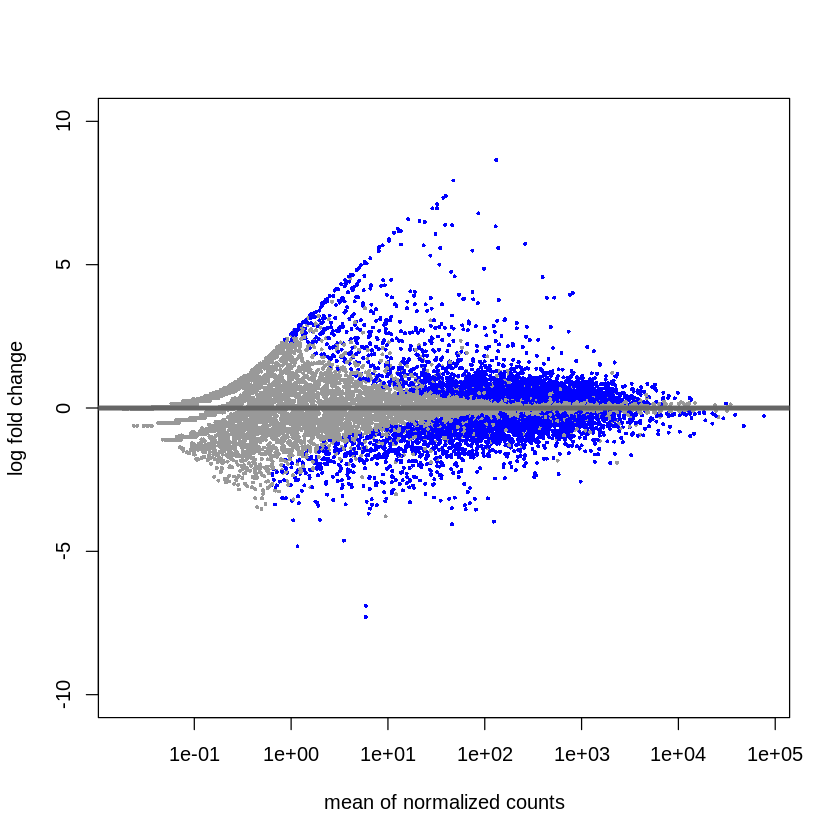

In [103]:
plotMA(dds_results$Th17p_Vehicle, ylim = c(-10, 10) )

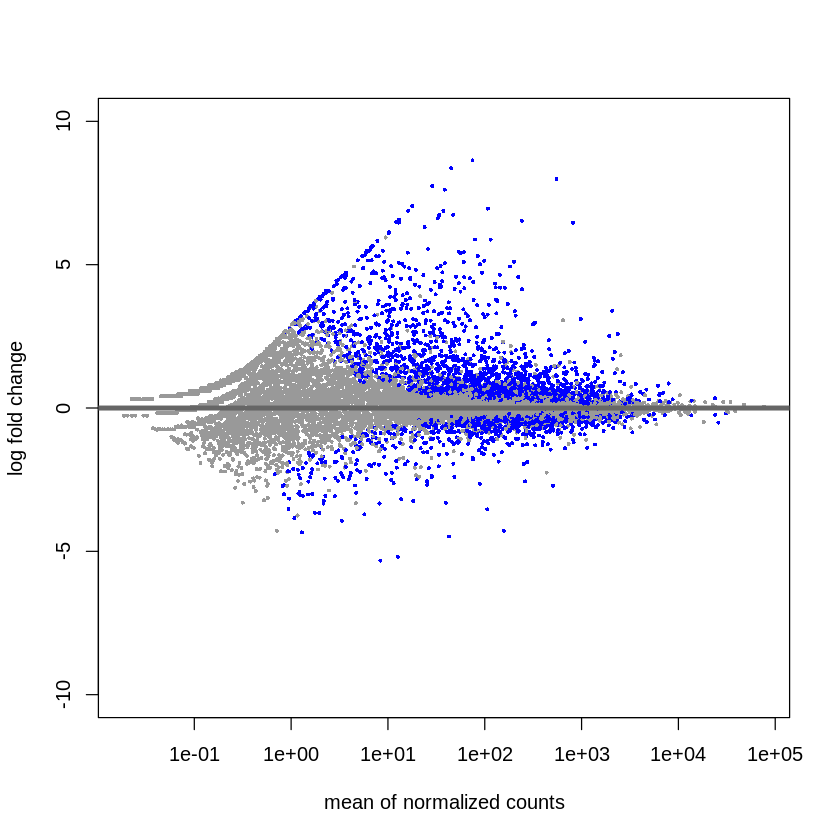

In [116]:
plotMA(dds_results$iTreg_Vehicle, ylim = c(-10, 10) )

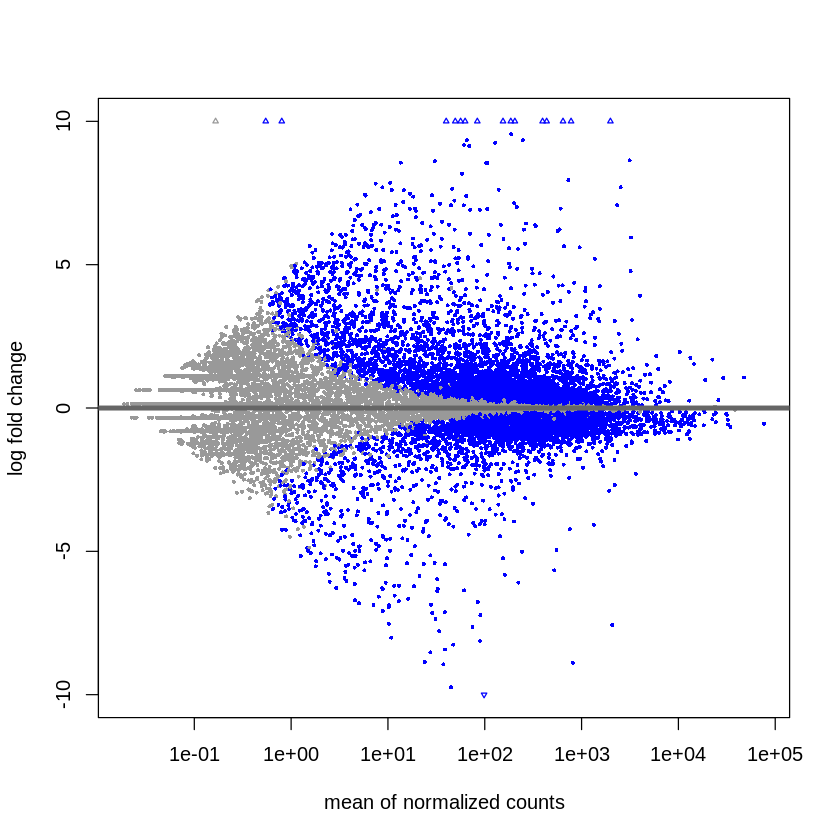

In [102]:
plotMA(res_all, ylim = c(-10, 10) )

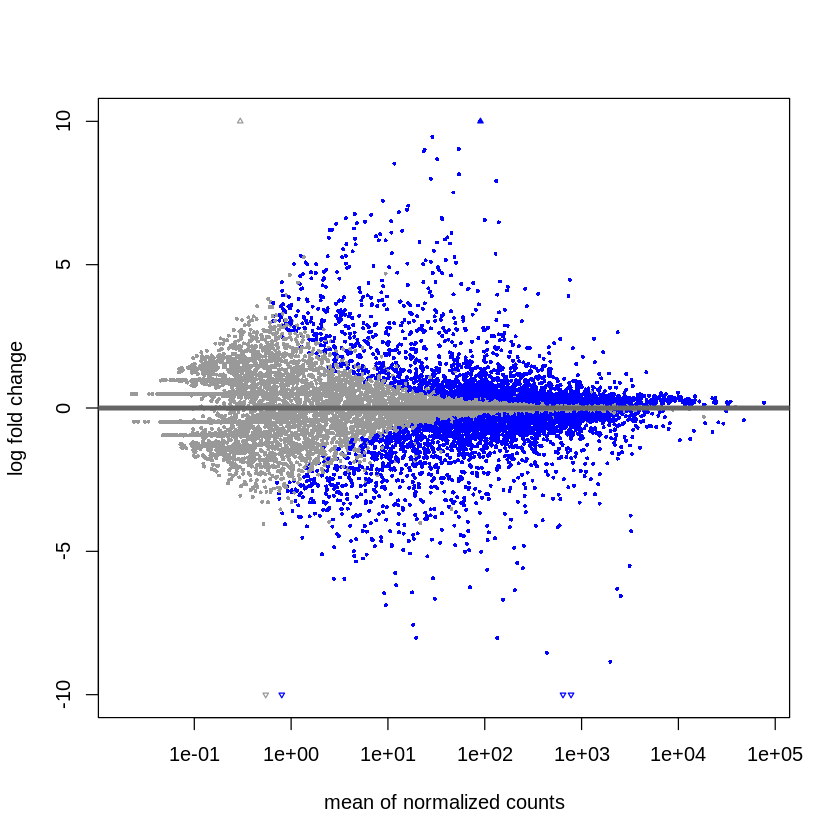

In [117]:
plotMA(r, ylim = c(-10, 10) )

In [118]:
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


In [98]:
dds_all <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data, 
                              design=~rep + sample)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [99]:
dds_all <- DESeq(dds_all)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [100]:
res_all <- results(dds_all)
res_all

log2 fold change (MLE): sample Th17p Vehicle vs iTreg DFMO 
Wald test p-value: sample Th17p Vehicle vs iTreg DFMO 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 877.90366       0.575453 0.0594915  9.672861 3.93228e-22
0610009B22RIK 108.51100      -0.276666 0.1130797 -2.446646 1.44192e-02
0610009L18RIK   3.27191      -0.123192 0.7142485 -0.172477 8.63062e-01
0610009O20RIK 203.81685      -0.111106 0.0978583 -1.135371 2.56220e-01
0610010F05RIK  28.81435       0.650939 0.2440219  2.667545 7.64078e-03
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          270.947      0.4814023 0.0902064  5.336678 9.46647e-08
ZYX             370.487      0.4724812 0.1024606  4.611343 4.00076e-06
ZZEF1           234.860     -0.0445362 0.0978150 -0.455311 6.488

In [114]:
for (r1 in unique(meta_data['sample'])$sample){
    for (r2 in unique(meta_data['sample'])$sample){
        if (r1 != r2){
            r <- results(dds_all, contrast=c("sample",r1,r2))
            fname <- paste(data_dir, 'deseq_genes_', r1, '_', r2, '.csv', sep = '')
            write.csv(r, file=fname)
        }
    }
}

# run only Thn vs Thp

In [126]:
compass_th <- compass_data %>% select(contains('Th17'))
compass_th <- compass_th %>% select(contains('Vehicle'))

In [127]:
compass_th

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,Th17p_Vehicle_WT2_run1,Th17p_Vehicle_WT2_run2,Th17n_Vehicle_WT2_run1,Th17n_Vehicle_WT2_run2,Th17p_Vehicle_WT3_run1,Th17p_Vehicle_WT3_run2,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,879,956,974,1064,905,1022,1183,1332
0610009B22RIK,93,98,66,70,103,77,88,83,93,97,94,76
0610009L18RIK,2,2,2,1,2,4,6,9,2,2,6,3
0610009O20RIK,177,206,148,170,149,162,187,216,204,250,249,284
0610010F05RIK,24,23,23,25,18,20,19,13,28,39,46,39
0610010K14RIK,182,254,211,256,171,176,228,267,206,220,243,288
0610011F06RIK,283,314,305,338,234,291,340,298,353,372,393,477
0610030E20RIK,212,210,164,195,176,206,182,246,227,247,261,258
0610037L13RIK,105,113,106,113,99,113,132,106,132,160,130,147


In [155]:
meta_data_th <- data.frame(colnames(compass_th))
rownames(meta_data_th) <- colnames(compass_th)
colnames(meta_data_th) <- c('sample')
meta_data_th$rep <- c(rep('WT1', 4),rep('WT2', 4),rep('WT3', 4))
meta_data_th$collapse <- meta_data_th$sample
meta_data_th$collapse <- str_replace(meta_data_th$collapse, '_run1', '')
meta_data_th$collapse <- str_replace(meta_data_th$collapse, '_run2', '')
meta_data_th$sample <- str_replace(meta_data_th$sample, '_run1', '')
meta_data_th$sample <- str_replace(meta_data_th$sample, '_run2', '')
meta_data_th$sample <- substr(meta_data_th$sample,1,nchar(meta_data_th$sample)-4)
meta_data_th

,sample,rep,collapse
,<chr>,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17p_Vehicle_WT2_run1,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17p_Vehicle_WT2_run2,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17n_Vehicle_WT2_run1,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17n_Vehicle_WT2_run2,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17p_Vehicle_WT3_run1,Th17p_Vehicle,WT3,Th17p_Vehicle_WT3


In [141]:
## first without collapsing technical replicates

In [197]:
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


In [159]:
dds_th <- DESeqDataSetFromMatrix(countData=compass_th, 
                              colData=meta_data_th, 
                              design=~rep + sample)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [160]:
dds_th_1 <- DESeq(dds_th)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [144]:
res_th_1 <- results(dds_th_1)
res_th_1

log2 fold change (MLE): sample Th17p Vehicle vs Th17n Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953     -0.1457658 0.0508805 -2.864867  0.00417185
0610009B22RIK  86.18692      0.2449138 0.1423735  1.720221  0.08539226
0610009L18RIK   3.37101     -0.8144729 0.6862180 -1.186901  0.23526661
0610009O20RIK 195.33555     -0.1106081 0.0934281 -1.183884  0.23645894
0610010F05RIK  25.53742     -0.0755394 0.2471687 -0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482      0.0809733 0.0900978  0.898727 3.68798e-01
ZYX             398.640     -0.4558469 0.0700428 -6.508119 7.60977e-11
ZZEF1           212.350      0.1518693 0.1070475  1.418710

In [173]:
write.csv(res_th_1, file='./data/th_data/deseq_genes_th_uncollapse.csv')

In [ ]:
# collapse technical replicates

In [156]:
meta_data_th

,sample,rep,collapse
,<chr>,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17p_Vehicle_WT2_run1,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17p_Vehicle_WT2_run2,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17n_Vehicle_WT2_run1,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17n_Vehicle_WT2_run2,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17p_Vehicle_WT3_run1,Th17p_Vehicle,WT3,Th17p_Vehicle_WT3


In [162]:
dds_th_2 <- collapseReplicates(dds_th, groupby = dds_th$collapse)

In [166]:
colData(dds_th_2)

DataFrame with 6 rows and 3 columns
                         sample      rep          collapse
                       <factor> <factor>       <character>
Th17n_Vehicle_WT1 Th17n_Vehicle      WT1 Th17n_Vehicle_WT1
Th17n_Vehicle_WT2 Th17n_Vehicle      WT2 Th17n_Vehicle_WT2
Th17n_Vehicle_WT3 Th17n_Vehicle      WT3 Th17n_Vehicle_WT3
Th17p_Vehicle_WT1 Th17p_Vehicle      WT1 Th17p_Vehicle_WT1
Th17p_Vehicle_WT2 Th17p_Vehicle      WT2 Th17p_Vehicle_WT2
Th17p_Vehicle_WT3 Th17p_Vehicle      WT3 Th17p_Vehicle_WT3

In [168]:
dds_th_2 <- DESeq(dds_th_2)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [169]:
res_th_2 <- results(dds_th_2)
res_th_2

log2 fold change (MLE): sample Th17p Vehicle vs Th17n Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 1893.14275     -0.1467180 0.0954779 -1.536671    0.124374
0610009B22RIK  172.13627      0.2426256 0.2478792  0.978806    0.327676
0610009L18RIK    6.75663     -0.7362570 1.2135075 -0.606718    0.544038
0610009O20RIK  391.97999     -0.1114945 0.1754324 -0.635541    0.525075
0610010F05RIK   51.10194     -0.0508497 0.4532624 -0.112186    0.910676
...                  ...            ...       ...       ...         ...
ZYG11A             0.000             NA        NA        NA          NA
ZYG11B           578.149      0.0821206  0.154632  0.531070 0.595370107
ZYX              799.606     -0.4582485  0.125636 -3.647429 0.000264877
ZZEF1            425.750      0.1473538  0.1783

In [174]:
write.csv(res_th_2, file='./data/th_data/deseq_genes_th_collapse.csv')

In [170]:
resultsNames(dds_th_1)

[1] "Intercept"                            
[2] "rep_WT2_vs_WT1"                       
[3] "rep_WT3_vs_WT1"                       
[4] "sample_Th17p_Vehicle_vs_Th17n_Vehicle"

In [171]:
resultsNames(dds_th_2)

[1] "Intercept"                            
[2] "rep_WT2_vs_WT1"                       
[3] "rep_WT3_vs_WT1"                       
[4] "sample_Th17p_Vehicle_vs_Th17n_Vehicle"

# explore differences

In [182]:
dds_all <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data, 
                              design=~rep + sample)
dds_all <- DESeq(dds_all)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [183]:
dds_th <- DESeqDataSetFromMatrix(countData=compass_th, 
                              colData=meta_data_th, 
                              design=~rep + sample)
dds_th <- DESeq(dds_th)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [188]:
results(dds_all, contrast=c("sample",'Th17p_Vehicle','Th17n_Vehicle'))

log2 fold change (MLE): sample Th17p_Vehicle vs Th17n_Vehicle 
Wald test p-value: sample Th17p_Vehicle vs Th17n_Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 877.90366     -0.1382053 0.0580017 -2.382782   0.0171824
0610009B22RIK 108.51100      0.2483511 0.1198900  2.071492   0.0383129
0610009L18RIK   3.27191     -0.9473706 0.6806631 -1.391835   0.1639724
0610009O20RIK 203.81685     -0.0995964 0.0986359 -1.009738   0.3126209
0610010F05RIK  28.81435     -0.0881894 0.2295932 -0.384111   0.7008958
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          270.947      0.0931601 0.0888465   1.04855 2.94385e-01
ZYX             370.487     -0.4502753 0.0997027  -4.51618 6.29660e-06
ZZEF1           234.860      0.1567380 0.0995688   1.57417

In [195]:
results(dds_th, contrast=c("sample",'Th17p_Vehicle','Th17n_Vehicle'))

log2 fold change (MLE): sample Th17p_Vehicle vs Th17n_Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953     -0.1457658 0.0508805 -2.864867  0.00417185
0610009B22RIK  86.18692      0.2449138 0.1423735  1.720221  0.08539226
0610009L18RIK   3.37101     -0.8144729 0.6862180 -1.186901  0.23526661
0610009O20RIK 195.33555     -0.1106081 0.0934281 -1.183884  0.23645894
0610010F05RIK  25.53742     -0.0755394 0.2471687 -0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482      0.0809733 0.0900978  0.898727 3.68798e-01
ZYX             398.640     -0.4558469 0.0700428 -6.508119 7.60977e-11
ZZEF1           212.350      0.1518693 0.1070475  1.418710

In [196]:
results(dds_th, contrast=c("sample",'Th17n_Vehicle','Th17p_Vehicle'))

log2 fold change (MLE): sample Th17n_Vehicle vs Th17p_Vehicle 
Wald test p-value: sample Th17n_Vehicle vs Th17p_Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953      0.1457658 0.0508805  2.864867  0.00417185
0610009B22RIK  86.18692     -0.2449138 0.1423735 -1.720221  0.08539226
0610009L18RIK   3.37101      0.8144729 0.6862180  1.186901  0.23526661
0610009O20RIK 195.33555      0.1106081 0.0934281  1.183884  0.23645894
0610010F05RIK  25.53742      0.0755394 0.2471687  0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482     -0.0809733 0.0900978 -0.898727 3.68798e-01
ZYX             398.640      0.4558469 0.0700428  6.508119 7.60977e-11
ZZEF1           212.350     -0.1518693 0.1070475 -1.418710